In [127]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.pyplot as plt
import pickle

In [128]:
ps = [2, 5, 8]
all_results = []
for p in ps:
    with open(f"data/4p4p{p}.pkl", "rb") as rdr:
        results = pickle.load(rdr)
        all_results.append(results)

In [129]:

def to_df(results):
    dfs = []
    cols = ["Loss", "RMS", "yaw", "pitch", "roll", "x", "y", "z"]
    for i, result in enumerate(results):
        df = pd.DataFrame(np.column_stack(result[1:]), columns=cols)
        df["Rep"] = i
        df["Run"] = list(range(len(result[1])))
        df["Experiment"] = result[0]
        dfs.append(df)
    df =  pd.concat(dfs, ignore_index=True)
    dfs = []
    for rep, grp in df.groupby("Rep"):
        grp["Normalized Loss"] = grp["Loss"] / grp["Loss"].iloc[0]
        grp["Normalized RMS"] = grp["RMS"] / grp["RMS"].iloc[0]
        dfs.append(grp)
    df = pd.concat(dfs, ignore_index=True)
    return pd.concat(dfs, ignore_index=True)

dfs = []
for p, results in zip(ps, all_results):
    df = to_df(results)
    df["$\\rho$"] = p
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

In [130]:
df_thetas = df.melt(["Experiment", "Loss", "Normalized Loss", "RMS", "Normalized RMS", "Rep", "Run"])
df_thetas

,Experiment,Loss,Normalized Loss,RMS,Normalized RMS,Rep,Run,variable,value
0,0,2.708050,1.000000,0.034982,1.000000,0,0,yaw,-0.107183
1,0,2.005334,0.740508,0.025490,0.728660,0,1,yaw,-0.143459
2,0,0.466090,0.172113,0.024046,0.687390,0,2,yaw,-0.158085
3,0,0.175891,0.064951,0.020329,0.581142,0,3,yaw,-0.121809
4,0,0.336472,0.124249,0.018386,0.525595,0,4,yaw,-0.097853
...,...,...,...,...,...,...,...,...,...
118673,6,0.287682,0.098056,0.037684,0.761781,69,96,$\rho$,8.000000
118674,6,0.268264,0.091437,0.037698,0.762073,69,97,$\rho$,8.000000
118675,6,0.276987,0.094410,0.037686,0.761821,69,98,$\rho$,8.000000
118676,6,0.251314,0.085660,0.037675,0.761614,69,99,$\rho$,8.000000


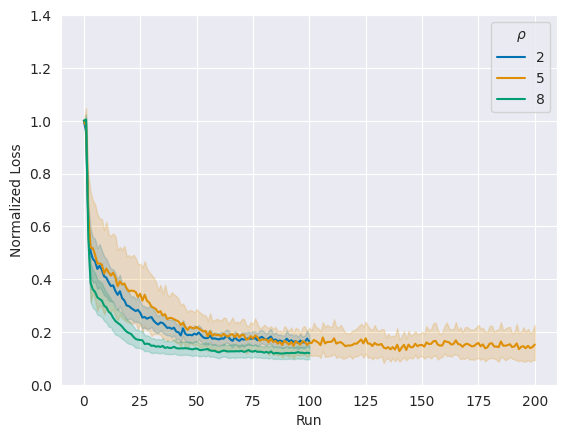

In [131]:
with sns.axes_style("darkgrid"):
    sns.lineplot(df, x="Run", y="Normalized Loss", hue="$\\rho$", palette="colorblind")
    plt.gca().set_ylim([0, 1.4])

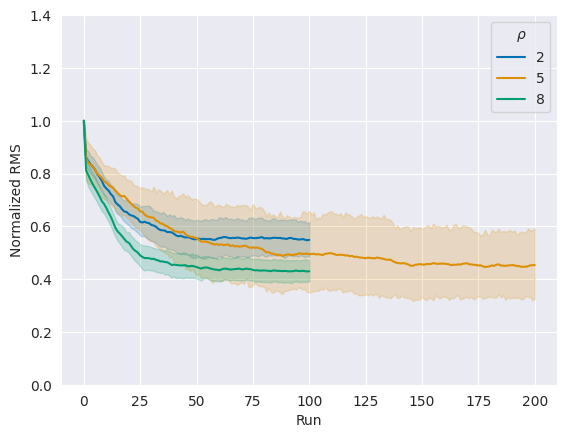

In [132]:
with sns.axes_style("darkgrid"):
    sns.lineplot(df, x="Run", y="Normalized RMS", hue="$\\rho$", palette="colorblind")
    plt.gca().set_ylim([0, 1.4])

In [133]:
# with sns.axes_style("darkgrid"):
#     for e, grp in df_thetas.groupby("Experiment"):
#         sns.lineplot(grp, x="Run", y="value", hue="variable")
#         plt.gca().set_ylabel(r"$\hat{\theta}_i - \theta^*_i$")
#         plt.show()

<Axes: xlabel='Run', ylabel='Normalized RMS'>

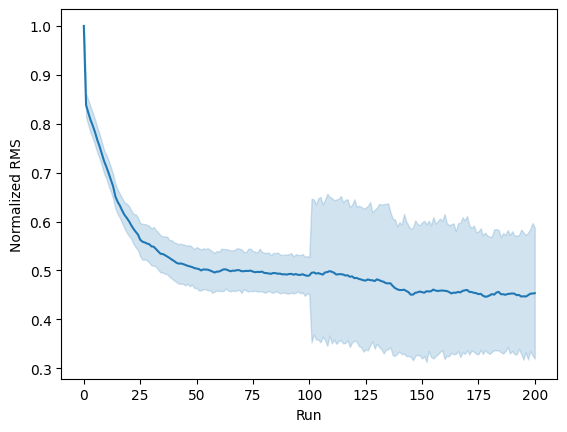

In [134]:
sns.lineplot(df, x="Run", y="Normalized RMS")